In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np

In [61]:
from scipy import stats
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import linregress

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [63]:
dataset= pd.read_csv (r"C:\Users\shile\OneDrive\Desktop\BSC\Semester 4\DTA612S - Data Analytics\Projects\StudentPerformanceFactors.csv")

In [64]:
dataset

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [65]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


# Data Visualization
 Understanding Overall Performance:
<li>	How is the overall distribution of exam scores?


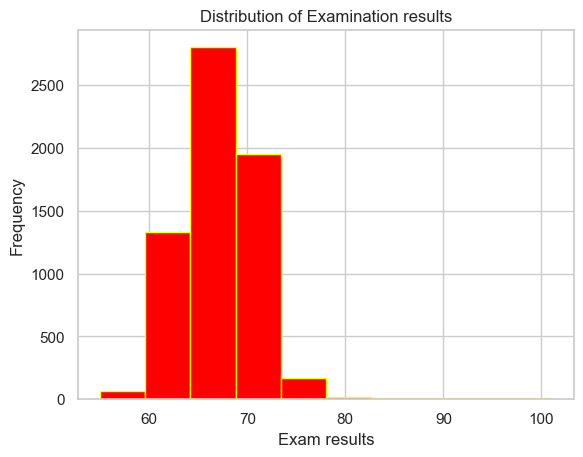

In [117]:
#plt.figure(figsize=(2,4))
plt.hist(dataset['Exam_Score'], bins = 10, color = 'red', edgecolor = 'yellow')
plt.title('Distribution of Examination results')
plt.xlabel('Exam results')
plt.ylabel('Frequency')
plt.show()

<li>	What are the summary statistics for exam scores (mean, median, mode, range)?

C:\Users\shile\AppData\Local\Temp\ipykernel_45544\1679439040.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




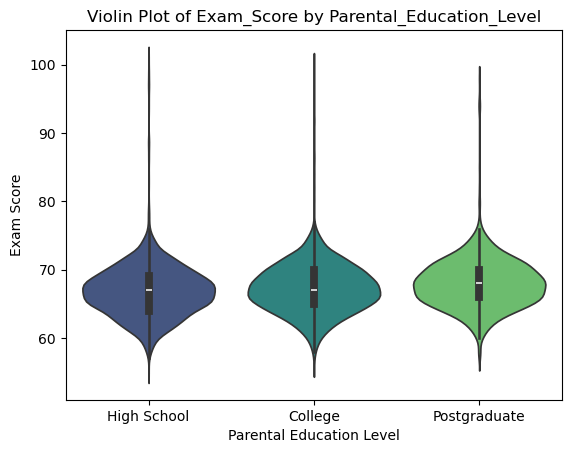

In [67]:
#plt.figure(figsize=(10, 6))
sns.violinplot(x='Parental_Education_Level', y='Exam_Score', data=dataset, palette='viridis')
plt.title('Violin Plot of Exam_Score by Parental_Education_Level')
plt.xlabel('Parental Education Level')
plt.ylabel('Exam Score')
plt.show()


# Study Habits and Academic Performance:
<li>	How does the number of hours studied per week correlate with exam scores?


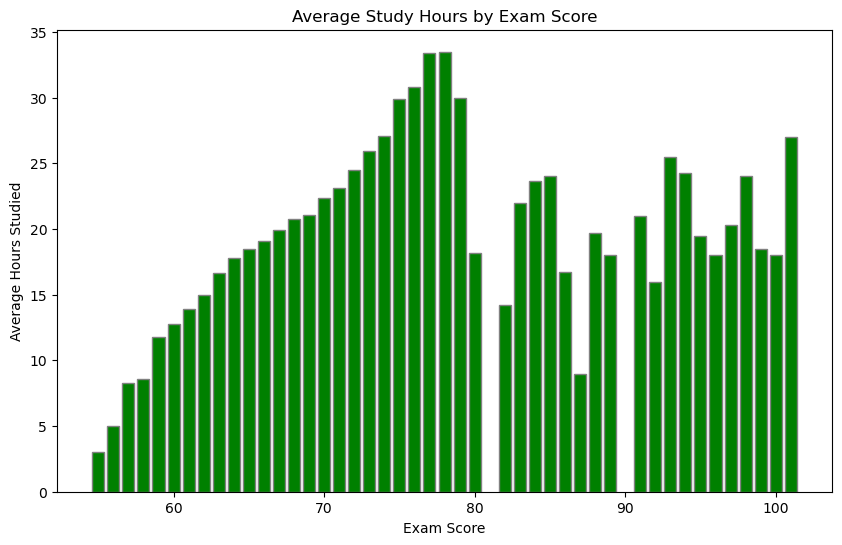

In [68]:
# Grouping data by 'Exam_Score' and calculating the mean 'Hours_Studied'
grouped_data = dataset.groupby('Exam_Score')['Hours_Studied'].mean()

# Creating a bar chart
plt.figure(figsize=(10, 6))  
plt.bar(grouped_data.index, grouped_data, color='green', edgecolor='gray')
plt.title('Average Study Hours by Exam Score')
plt.xlabel('Exam Score')
plt.ylabel('Average Hours Studied')
plt.show()


<Axes: xlabel='Exam_Score', ylabel='Hours_Studied'>

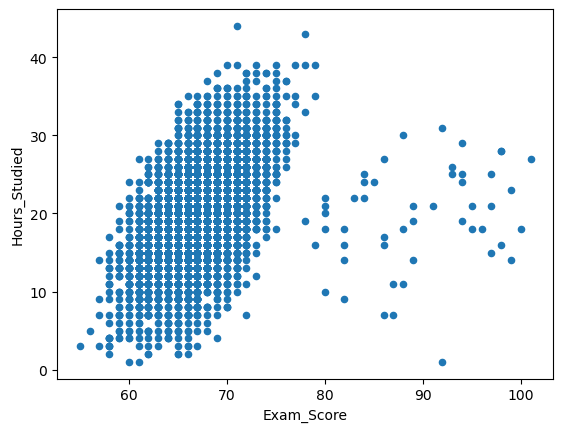

In [69]:
dataset.plot(kind='scatter', x='Exam_Score', y='Hours_Studied')

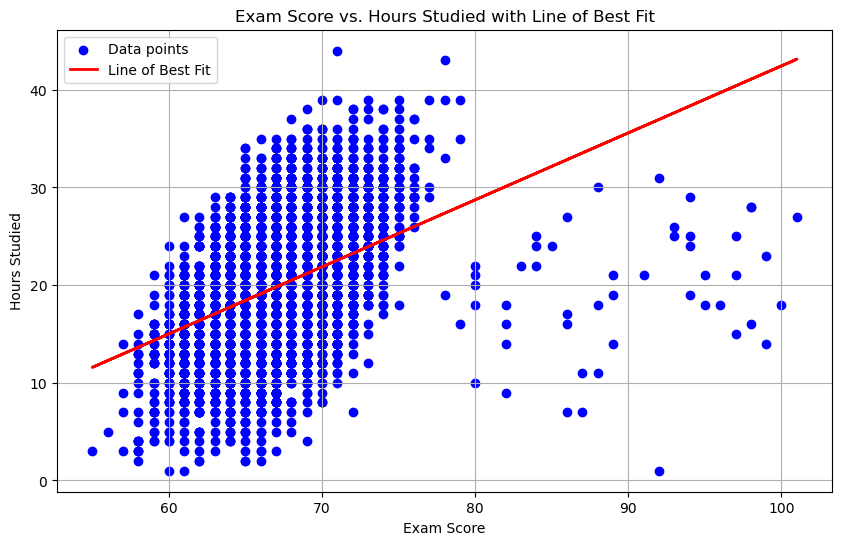

In [70]:


# Extract data for plotting
x = dataset['Exam_Score']
y = dataset['Hours_Studied']

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line_of_best_fit = slope * x + intercept

# Plot the data and the line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, line_of_best_fit, color='red', linestyle='-', linewidth=2, label='Line of Best Fit')
plt.title('Exam Score vs. Hours Studied with Line of Best Fit')
plt.xlabel('Exam Score')
plt.ylabel('Hours Studied')
plt.legend()
plt.grid(True)
plt.show()



# Attendance and Its Impact:
<li>	What is the relationship between attendance percentage and exam scores?
<li>	Do students with higher attendance consistently score better in exams?


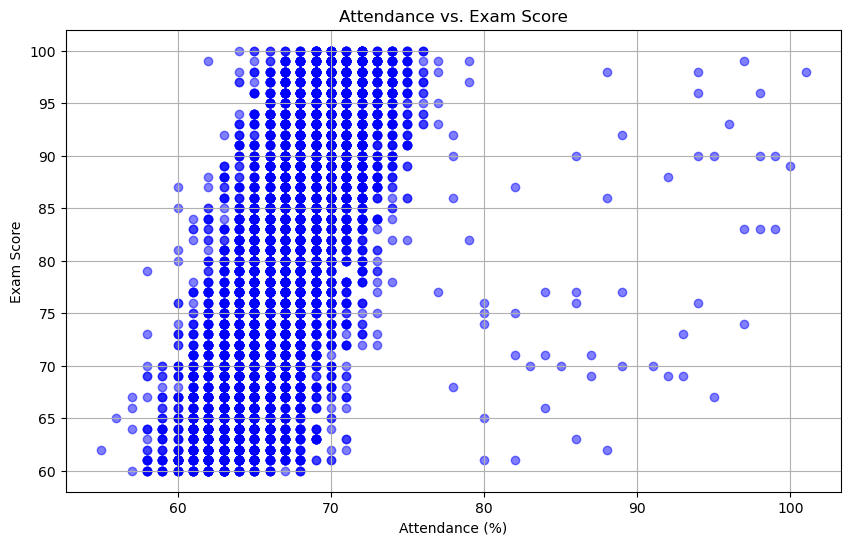

In [71]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Exam_Score'], dataset['Attendance'], color='blue', alpha=0.5)
plt.title('Attendance vs. Exam Score')
plt.xlabel('Attendance (%)')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

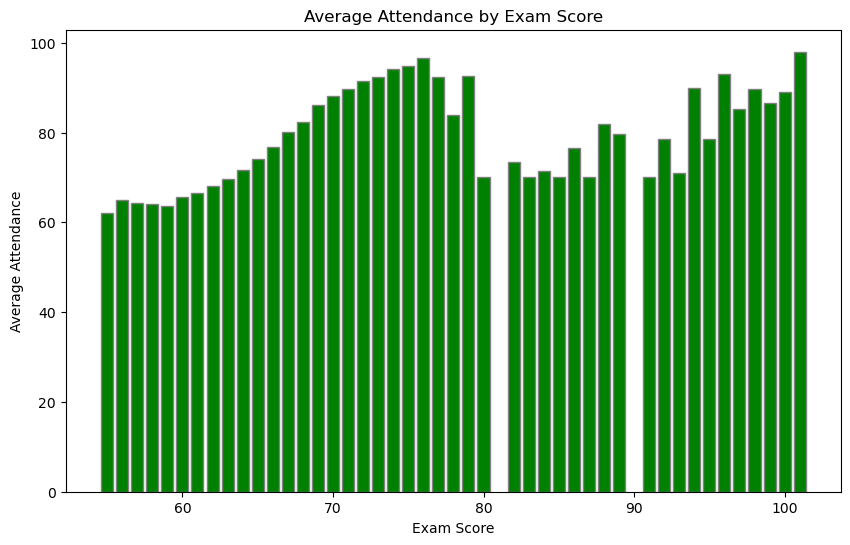

In [72]:
# Grouping data by 'Exam_Score' and calculating the mean 'Attendance'
grouped_data = dataset.groupby('Exam_Score')['Attendance'].mean()

# Creating a bar chart
plt.figure(figsize=(10, 6))  
plt.bar(grouped_data.index, grouped_data, color='green', edgecolor='gray')
plt.title('Average Attendance by Exam Score')
plt.xlabel('Exam Score')
plt.ylabel('Average Attendance')
plt.show()

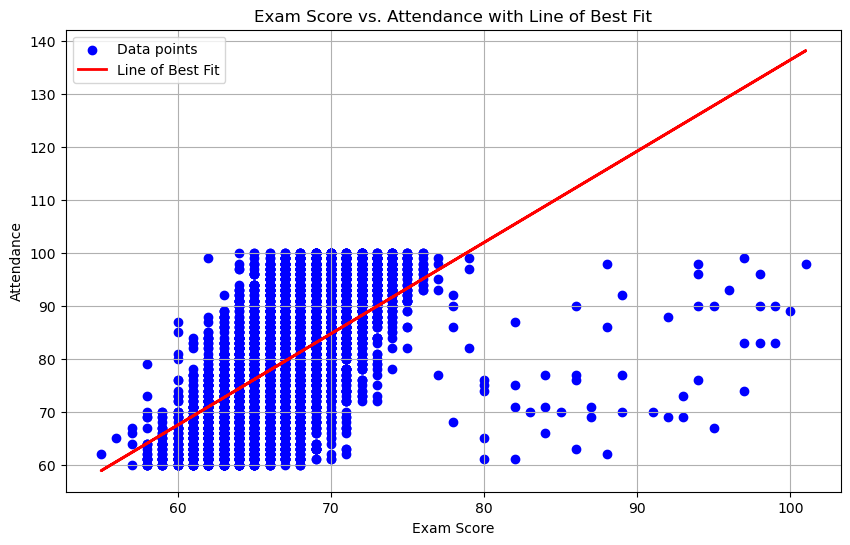

In [73]:
# Extract data for plotting
x = dataset['Exam_Score']
y = dataset['Attendance']

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line_of_best_fit = slope * x + intercept

# Plot the data and the line of best fit
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, line_of_best_fit, color='red', linestyle='-', linewidth=2, label='Line of Best Fit')
plt.title('Exam Score vs. Attendance with Line of Best Fit')
plt.xlabel('Exam Score')
plt.ylabel('Attendance')
plt.legend()
plt.grid(True)
plt.show()

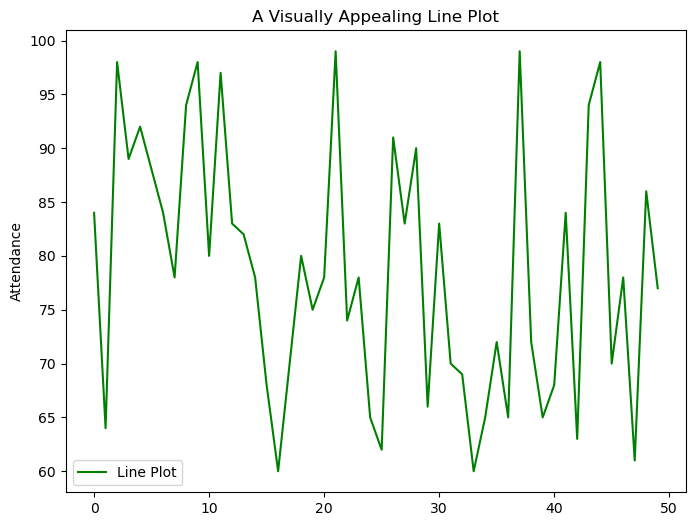

In [74]:
plt.figure(figsize=(8, 6))
sns.lineplot(dataset['Attendance'][:50], color='green', label='Line Plot')
plt.title('A Visually Appealing Line Plot')
plt.legend()


<Axes: >

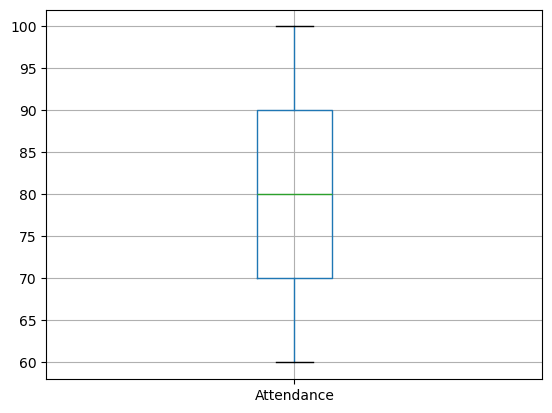

In [75]:
dataset.boxplot(column='Attendance')

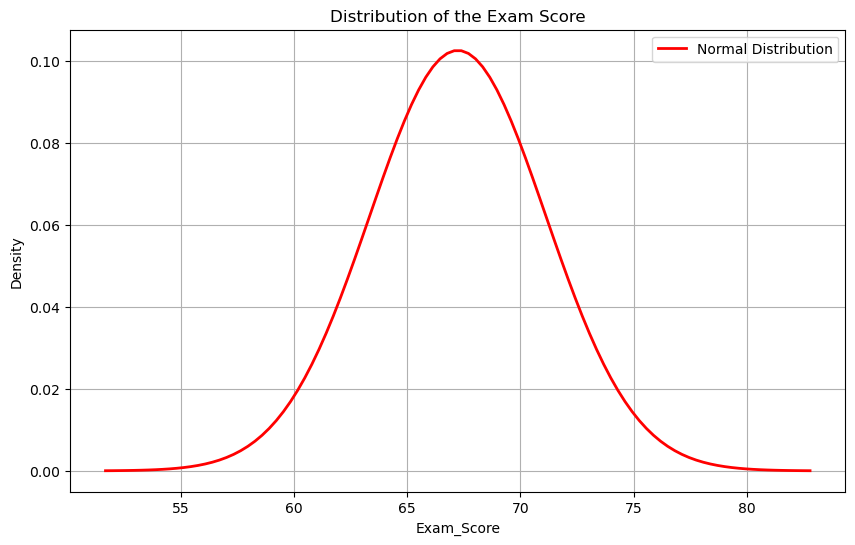

In [76]:
column_name = 'Exam_Score'

plt.figure(figsize=(10, 6))


mean = dataset['Exam_Score'].mean()
std_dev = dataset['Exam_Score'].std()
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 100)
p = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
plt.plot(x, p, color='red', label='Normal Distribution', linewidth=2)


plt.title('Distribution of the ' + 'Exam Score')
plt.xlabel('Exam_Score')
plt.ylabel('Density')
plt.legend()
plt.grid()

plt.show()

# Machine Learning

In [77]:
print(dataset.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [78]:
dataset.isnull().any()

Hours_Studied                 False
Attendance                    False
Parental_Involvement          False
Access_to_Resources           False
Extracurricular_Activities    False
Sleep_Hours                   False
Previous_Scores               False
Motivation_Level              False
Internet_Access               False
Tutoring_Sessions             False
Family_Income                 False
Teacher_Quality                True
School_Type                   False
Peer_Influence                False
Physical_Activity             False
Learning_Disabilities         False
Parental_Education_Level       True
Distance_from_Home             True
Gender                        False
Exam_Score                    False
dtype: bool

<Axes: >

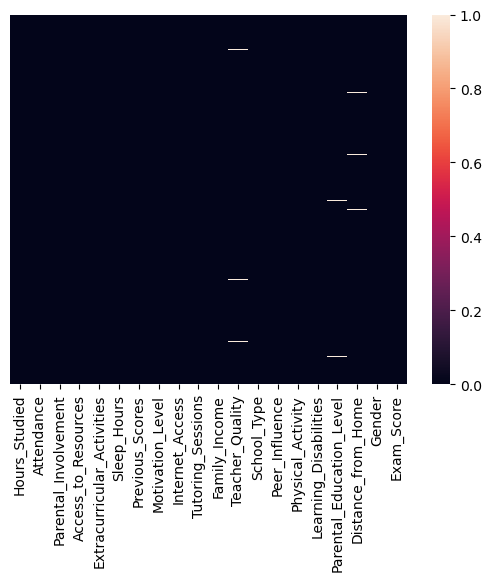

In [79]:
sns.heatmap(dataset.isnull(),yticklabels=False)

In [80]:
unique_counts = dataset.nunique()
print(unique_counts)

Hours_Studied                 41
Attendance                    41
Parental_Involvement           3
Access_to_Resources            3
Extracurricular_Activities     2
Sleep_Hours                    7
Previous_Scores               51
Motivation_Level               3
Internet_Access                2
Tutoring_Sessions              9
Family_Income                  3
Teacher_Quality                3
School_Type                    2
Peer_Influence                 3
Physical_Activity              7
Learning_Disabilities          2
Parental_Education_Level       3
Distance_from_Home             3
Gender                         2
Exam_Score                    45
dtype: int64


In [81]:
print("Duplicate Rows:", dataset.duplicated().sum())

Duplicate Rows: 0


In [82]:
print("Data Types:")
print(dataset.dtypes)

Data Types:
Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object


In [83]:
print("Summary Statistics:")
print(dataset.describe())

Summary Statistics:
       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.0000

In [84]:
numerical_columns = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
z_scores = np.abs(stats.zscore(dataset[numerical_columns]))
outliers = dataset[(z_scores > 3).any(axis=1)]
print("Outliers:")
print(outliers)

Outliers:
      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
94               18          89                 High              Medium   
113              35          99                 High                High   
209              43          86                 High              Medium   
217              19          70               Medium                 Low   
262               1          69                 High              Medium   
...             ...         ...                  ...                 ...   
6061             24          67                 High                 Low   
6347             28          96                 High                 Low   
6393             16          83                  Low              Medium   
6485             35          84                  Low              Medium   
6522             18          90                 High                High   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
94          

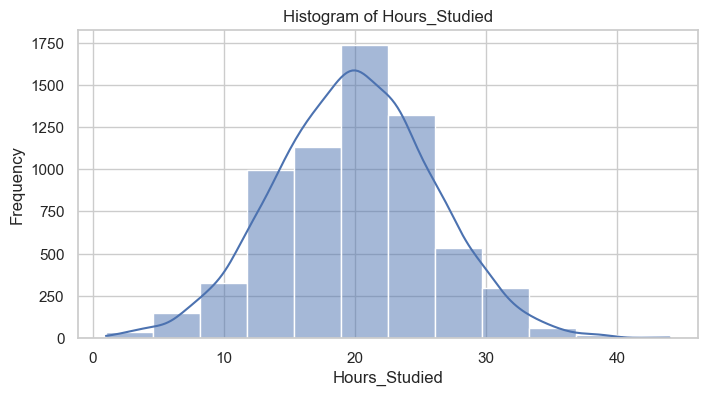

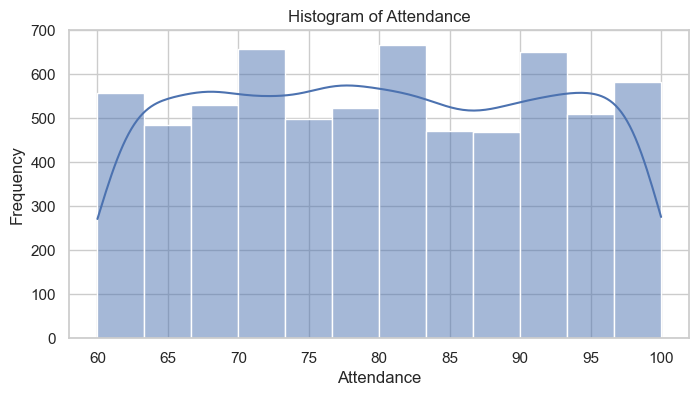

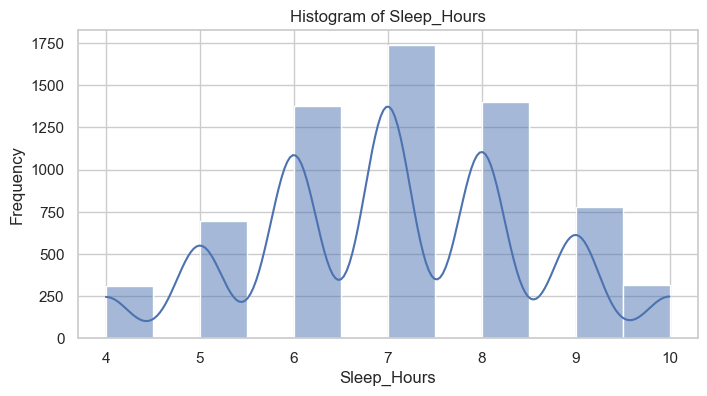

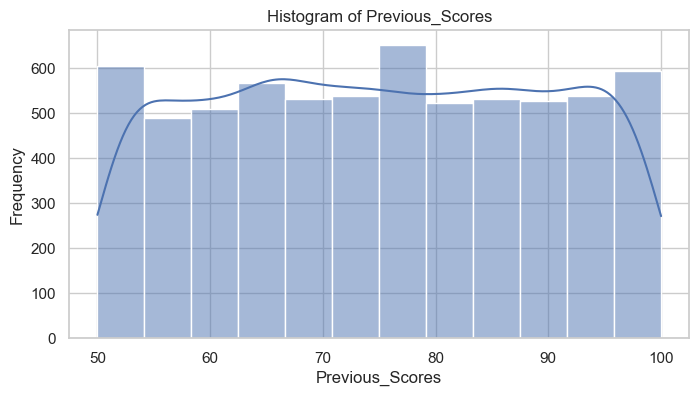

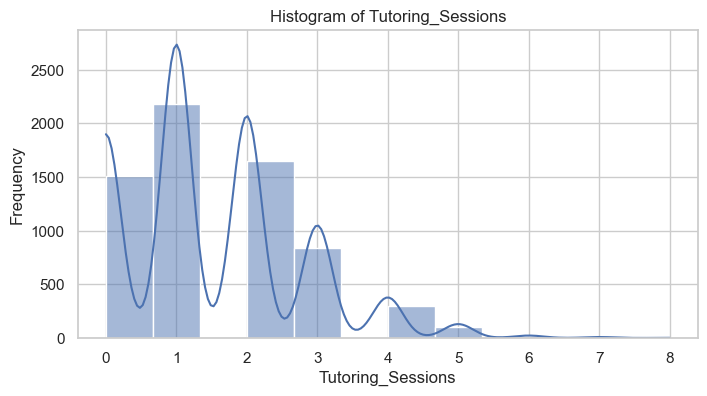

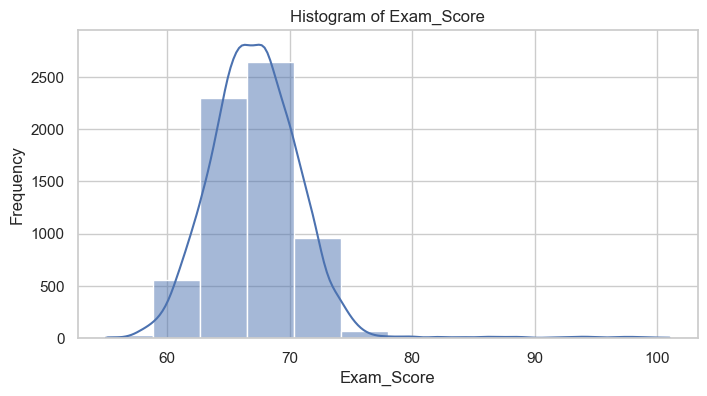

In [85]:
sns.set(style="whitegrid")

numerical_columns = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Exam_Score']

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(dataset[column], bins=12, kde=True) 
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [86]:
dataset.dropna(inplace=True)

In [87]:
dataset

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [88]:
print(dataset.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [89]:
categorical_columns = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities','Motivation_Level',
                       'Internet_Access','Family_Income','Teacher_Quality','School_Type','Peer_Influence','Learning_Disabilities', 
                        'Parental_Education_Level', 'Distance_from_Home','Gender']
le = LabelEncoder()

for col in categorical_columns:
    dataset[col] = le.fit_transform(dataset[col])



In [90]:
array = dataset.values
X = array[:, 0:11]
Y = array[:,11]

In [91]:
validation_size = 0.20
seed = 21
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [92]:
seed = 21
scoring = 'accuracy'

In [93]:

models = [] #This creates an empty list
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# print(models)
# evaluate each model in turn
results = []
names = []
for name, model in models:
        kfold = model_selection.KFold(n_splits=50, random_state=seed, shuffle=True)
        cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

LDA: 0.596638 (0.043836)
KNN: 0.495304 (0.049796)
CART: 0.461561 (0.050460)
NB: 0.596638 (0.043836)
SVM: 0.596638 (0.043836)


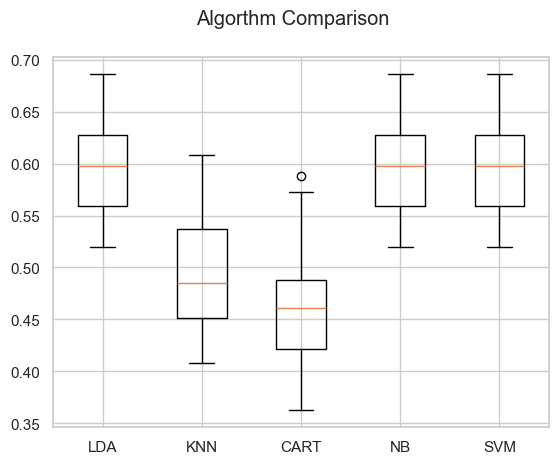

In [94]:
fig = plt.figure()
fig.suptitle('Algorthm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [95]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print("\t=============================================\n")
print(confusion_matrix(Y_validation, predictions))
print("\t=============================================\n")
print(classification_report(Y_validation, predictions))

0.6128526645768025

[[  0   0 363]
 [  0   0 131]
 [  0   0 782]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       363
           1       0.00      0.00      0.00       131
           2       0.61      1.00      0.76       782

    accuracy                           0.61      1276
   macro avg       0.20      0.33      0.25      1276
weighted avg       0.38      0.61      0.47      1276



c:\Users\shile\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\shile\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\shile\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [119]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print("\t=============================================\n")
print(confusion_matrix(Y_validation, predictions))
print("\t=============================================\n")
print(classification_report(Y_validation, predictions))

0.6105015673981191

[[145  14 204]
 [ 44  18  69]
 [144  22 616]]

              precision    recall  f1-score   support

           0       0.44      0.40      0.42       363
           1       0.33      0.14      0.19       131
           2       0.69      0.79      0.74       782

    accuracy                           0.61      1276
   macro avg       0.49      0.44      0.45      1276
weighted avg       0.58      0.61      0.59      1276



In [120]:
from sklearn import metrics
print(metrics.accuracy_score(Y, knn.predict(X)))
print(metrics.accuracy_score(Y, lda.predict(X)))

0.6042646597679523
0.5998745688303544


In [99]:
print(X.shape)
print(Y.shape)

(6378, 11)
(6378,)


In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state=4)
# Random state is given any random integer value so that each time we train and test our model the values remain same.

In [101]:
print(X_train.shape)
print(X_test.shape)

(3826, 11)
(2552, 11)


In [102]:
print(Y_train.shape)
print(Y_test.shape)

(3826,)
(2552,)


In [103]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [104]:
Y_predict = lda.predict(X_test)
print(Y_predict)

[2 2 2 ... 2 2 2]


In [105]:
print(metrics.accuracy_score(Y_test, Y_predict))

0.5889498432601881


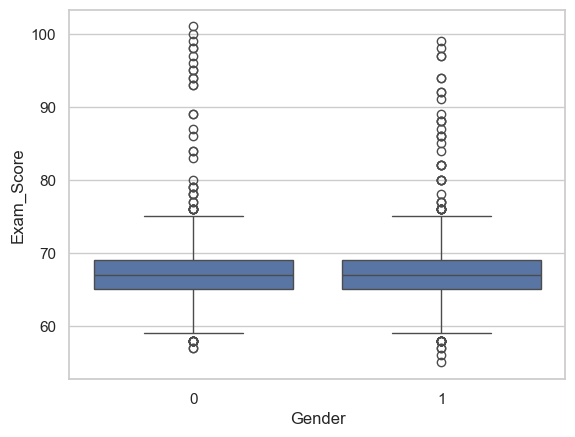

In [106]:
sns.boxplot(x='Gender', y='Exam_Score', data=dataset)
plt.show()


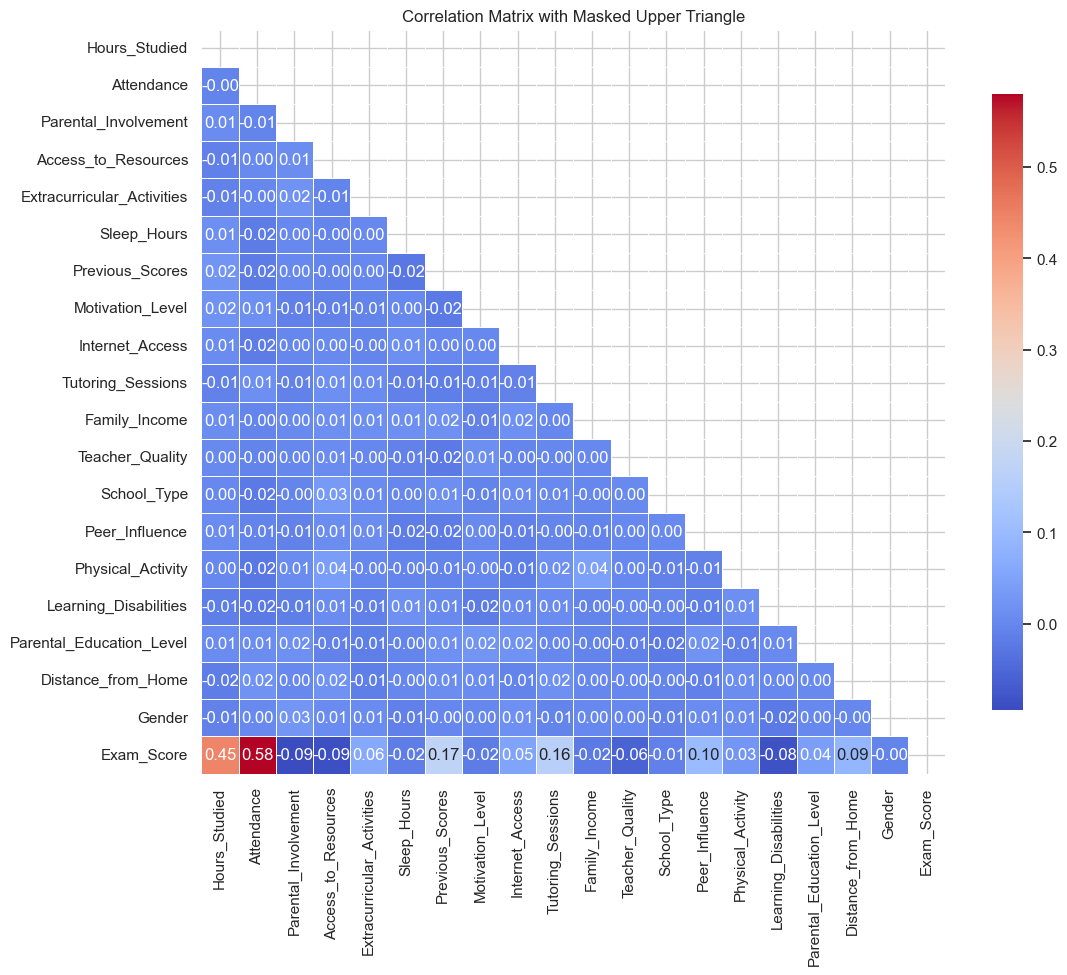

In [107]:
corr_matrix = dataset.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the heatmap
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f",  # Format the annotations to 2 decimal places
            mask=mask, 
            cmap='coolwarm', 
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .8})

plt.title('Correlation Matrix with Masked Upper Triangle')
plt.show()

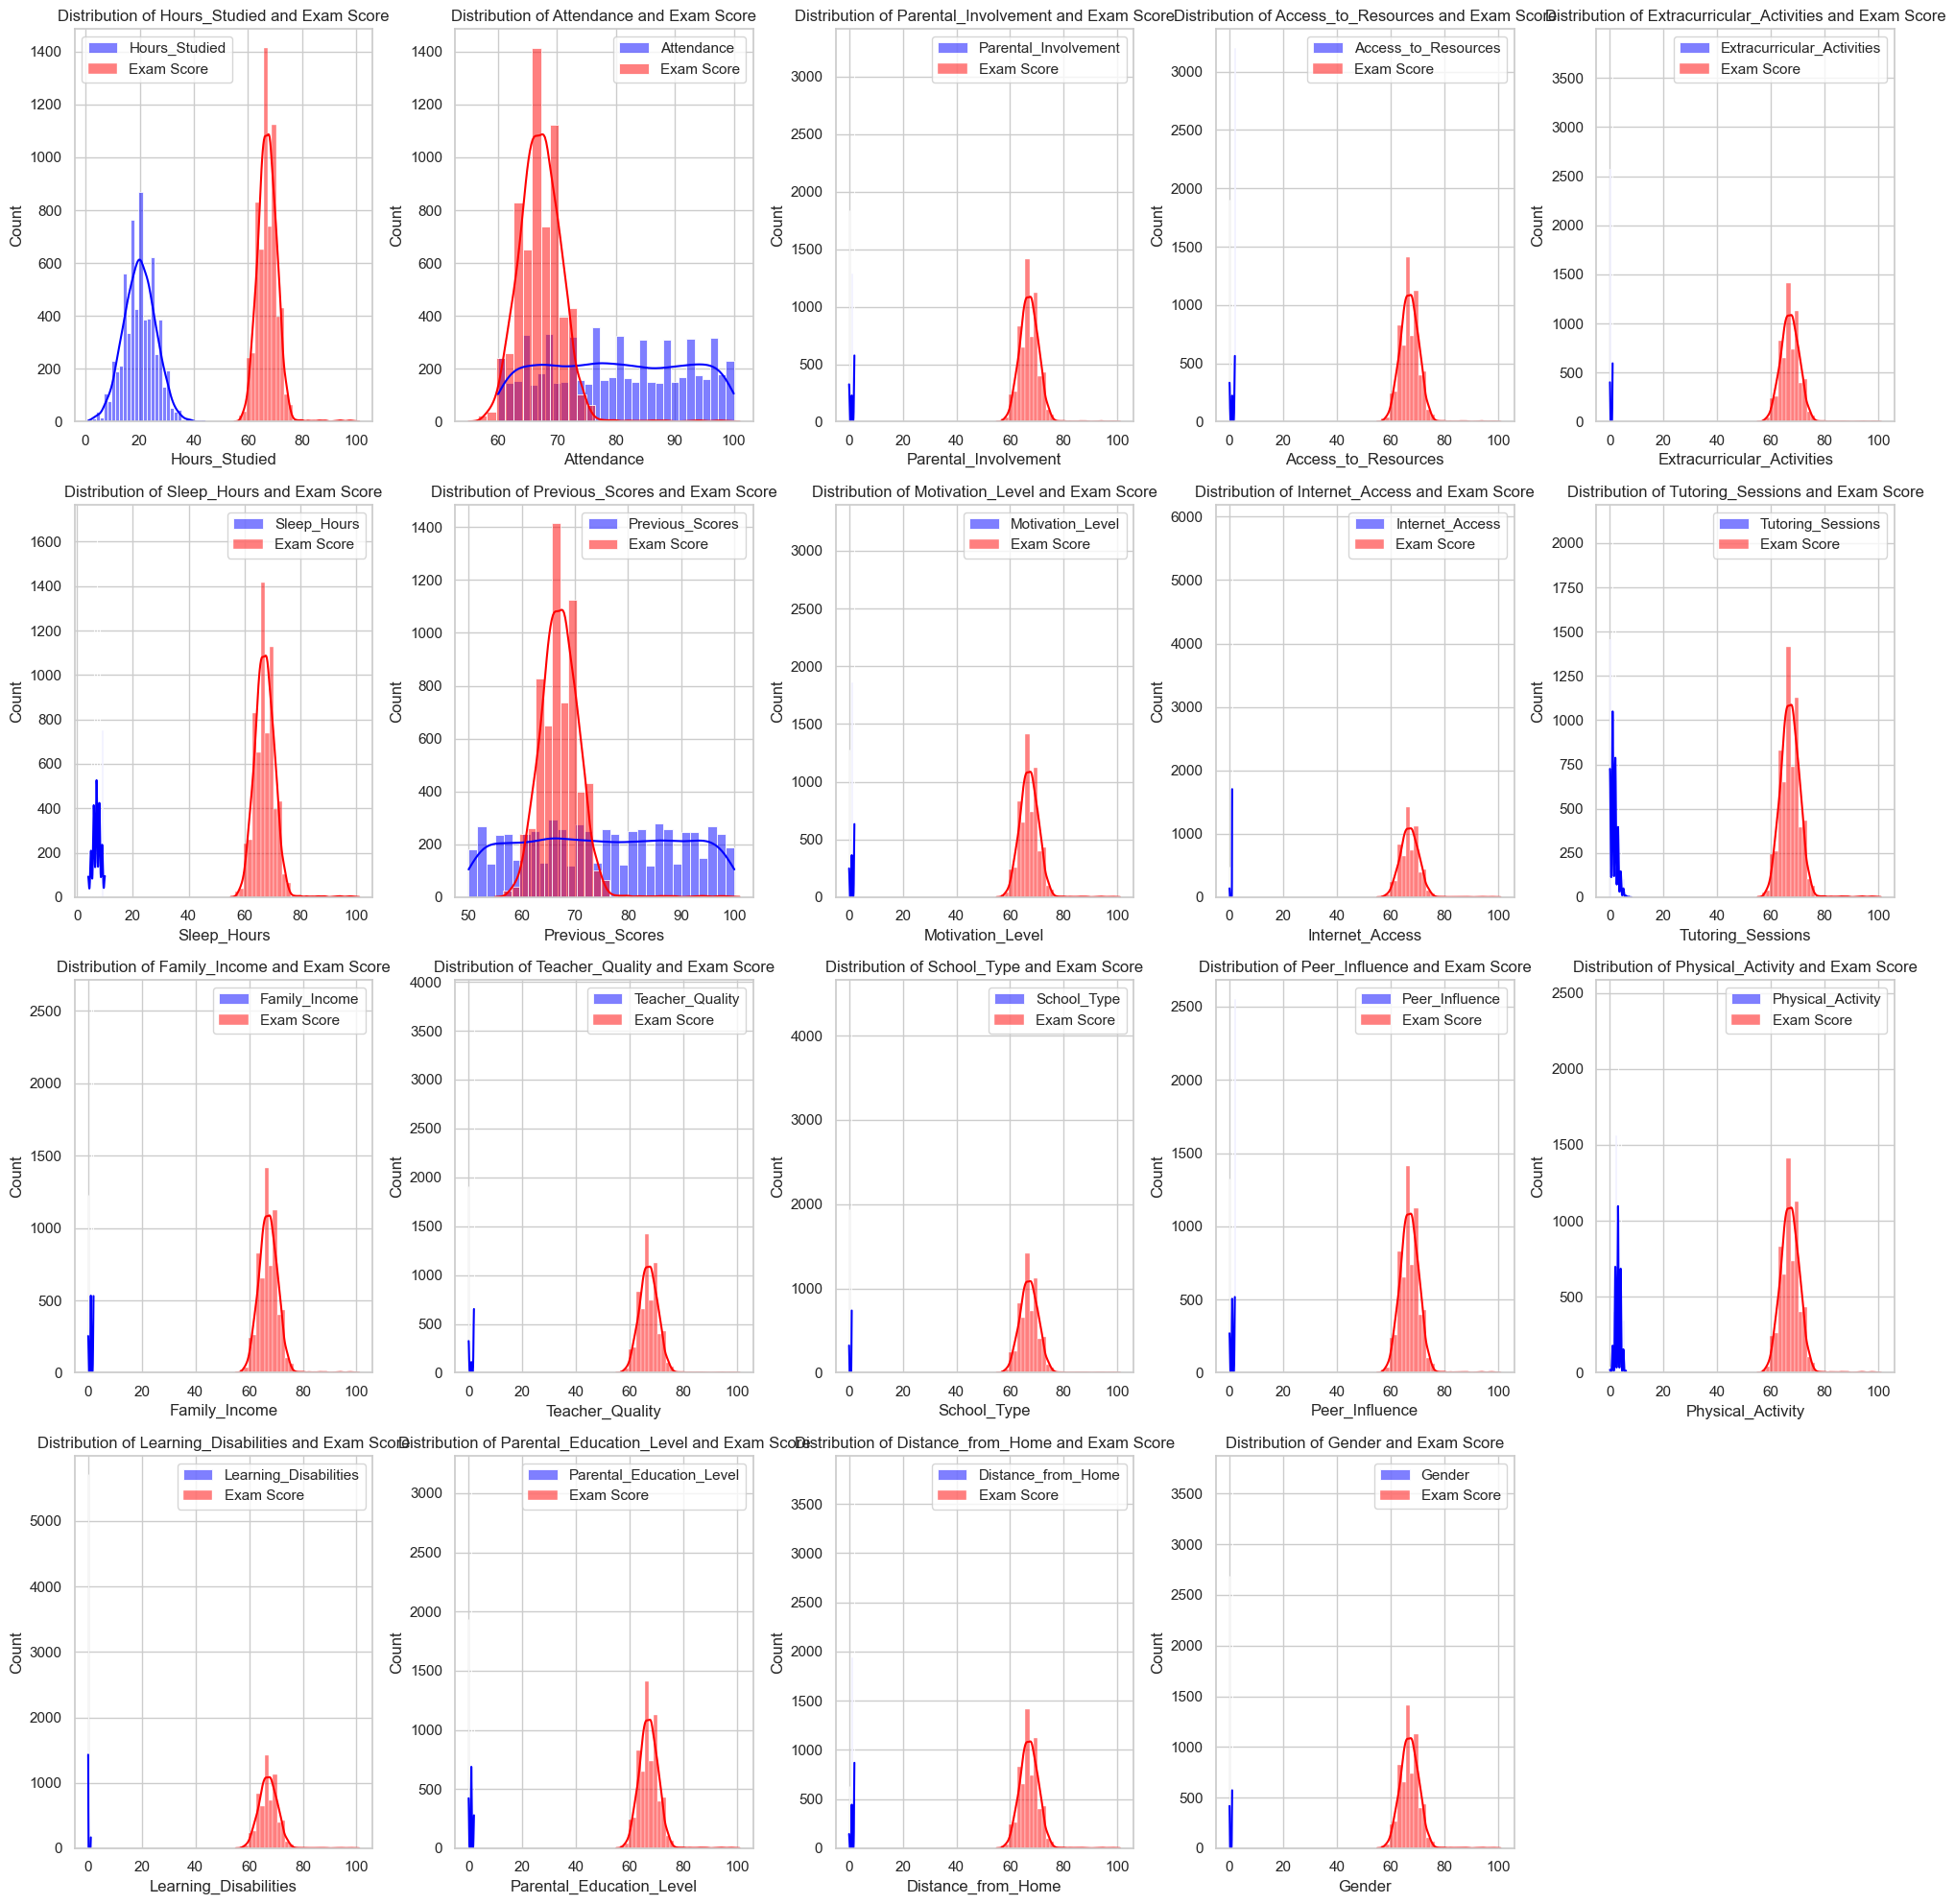

In [108]:
features = [
    'Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 
                 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 
                 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 
                 'Family_Income', 'Teacher_Quality', 'School_Type', 
                 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 
                 'Parental_Education_Level', 'Distance_from_Home', 'Gender'
]

# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Loop through features to create histograms
for i, feature in enumerate(features, 1):
    plt.subplot(4, 5, i)  # Adjust subplot grid as necessary
    sns.histplot(dataset[feature], kde=True, color='blue', label=feature, bins=30)
    sns.histplot(dataset['Exam_Score'], kde=True, color='red', label='Exam Score', bins=30)
    plt.title(f'Distribution of {feature} and Exam Score')
    plt.legend()

plt.tight_layout()
plt.show()

In [109]:
dataset = dataset.drop(['Distance_from_Home','Gender','Parental_Involvement','Learning_Disabilities','Teacher_Quality','Extracurricular_Activities','School_Type','Internet_Access'], axis=1)


In [110]:
dataset

,Hours_Studied,Attendance,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Peer_Influence,Physical_Activity,Parental_Education_Level,Exam_Score
0,23,84,0,7,73,1,0,1,2,3,1,67
1,19,64,2,8,59,1,2,2,0,4,0,61
2,24,98,2,7,91,2,2,2,1,4,2,74
3,29,89,2,8,98,2,1,2,0,4,1,71
4,19,92,2,6,65,2,3,2,1,4,0,70
...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2,7,76,2,1,0,2,2,1,68
6603,23,76,2,8,81,2,3,1,2,2,1,69
6604,20,90,1,6,65,1,3,1,0,2,2,68
6605,10,86,0,6,91,0,2,1,2,3,1,68


In [111]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Define a dictionary for each model and its parameter grid
param_grids = {
    'SVM': {
        'C': [0.1, 1],  # Reduce the number of values
        'kernel': ['linear'],  # Try only one kernel
        'gamma': ['scale']  # Limit to 'scale'
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    }
}

In [112]:
models = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Use a common seed for reproducibility
seed = 21
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)  # Use 3-fold instead of 10


In [113]:
param_grids['CART'] = {
    'max_depth': [3, 5, 7, 9, 11, 15],  # Increase the depth
    'min_samples_split': [2, 5, 10, 20],  # Try larger values
    'min_samples_leaf': [1, 2, 4, 6],  # More values to explore
    'criterion': ['gini', 'entropy'],  # Add criterion as a parameter to tune
    'max_features': ['auto', 'sqrt', 'log2', None]  # Add max_features to control the number of features used in splitting
}

models['CART'] = DecisionTreeClassifier()

grid = GridSearchCV(estimator=models['CART'], param_grid=param_grids['CART'], cv=kfold, scoring='accuracy', verbose=1)
grid.fit(X_train, Y_train)
print(f"CART Best Score: {grid.best_score_}")
print(f"CART Best Parameters: {grid.best_params_}")


Fitting 10 folds for each of 768 candidates, totalling 7680 fits


c:\Users\shile\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


1920 fits failed out of a total of 7680.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1920 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\shile\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\shile\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\shile\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\shile\anaconda3\Lib\site-pa

CART Best Score: 0.6079593454813884
CART Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 2}


c:\Users\shile\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning:

One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.6050825  0.60560401
 0.60586579 0.60638866 0.60455962 0.60612894 0.60429989 0.60586784
 0.60586647 0.60691154 0.60665044 0.60717332 0.60795935 0.60403743
 0.60534223 0.60612894 0.60665113 0.60638866 0.60717332 0.60612894
 0.60534359 0.60665181 0.60560674 0.60664976 0.60612688 0.60717469
 0.60560674 0.60560538 0.60534291 0.6066525  0.60691223 0.60691223
 0.60273126 0.60273126 0.60273126 0.60273126 0.60273126 0.60273126
 0.60273126 0.60273126 0.60273126 0.60273126 0.60273126 0.60273126
 0.60247017 0.60247017 0.60247017 0.60247017        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan       